Project Task: Week 1

Class Imbalance Problem:

1. Perform an EDA on the dataset.

       a)  See what a positive, negative, and neutral review looks like

       b)  Check the class count for each class. It’s a class imbalance problem.

2. Convert the reviews in Tf-Idf score.

3. Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

Project Task: Week 2

Tackling Class Imbalance Problem:

    Oversampling or undersampling can be used to tackle the class imbalance problem. 
    In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
    Use Tree-based classifiers like Random Forest and XGBoost.

       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

Project Task: Week 3

Model Selection:

    Apply multi-class SVM’s and neural nets.
    Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
    Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

Project Task: Week 4

Applying LSTM:

    Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

       Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

      2. Compare the accuracy of neural nets with traditional ML based algorithms.

      3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 

       Hint: Use techniques like Grid Search, Cross-Validation and Random Search

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics  import roc_auc_score,roc_curve
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.model_selection import cross_val_predict,cross_val_score
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR,SVC
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
import nltk
from nltk.corpus import stopwords
import re
from nltk.tokenize import word_tokenize 
from textblob import TextBlob

from sklearn.datasets import make_classification
from sklearn.ensemble import VotingClassifier





In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train_data.csv')
df.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


In [4]:
df_test = pd.read_csv('test_data.csv')
df_test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Include...",Amazon,"Fire Tablets,Computers/Tablets & Networking,Ta...",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and c...,very handy device
1,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2018-01-02T00:00:00.000Z,The Echo Show is a great addition to the Amazo...,Another winner from Amazon
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas...,simple to use and reliable so far
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to g...",Love it!!!
4,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Computers,Amazon Echo,Virtual Assistant Speake...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought...,Fantastic!


# Week 1

Class Imbalance Problem:

    Perform an EDA on the dataset.

    a)  See what a positive, negative, and neutral review looks like

    b)  Check the class count for each class. It’s a class imbalance problem.

    Convert the reviews in Tf-Idf score.

    Run multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.


In [5]:
df['reviews.title'].value_counts()

Great tablet                      100
Great product                      63
Love it                            52
Great                              49
Great for kids                     43
                                 ... 
Perfect for young kids              1
My Kid Loves it                     1
Alexa Rocks!                        1
Nice tablet for my little girl      1
Not an iPad by any means            1
Name: reviews.title, Length: 2606, dtype: int64

In [6]:
setiment=df['sentiment'].value_counts(normalize=True)

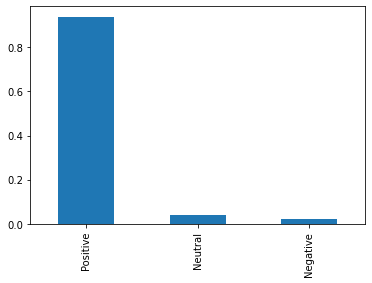

In [7]:
setiment.plot(kind='bar')

In [8]:
tfidfmodel = TfidfVectorizer(stop_words='english')
data = tfidfmodel.fit_transform(df['reviews.text'])
data

<4000x4633 sparse matrix of type '<class 'numpy.float64'>'
	with 50580 stored elements in Compressed Sparse Row format>

In [9]:
feature=tfidfmodel.get_feature_names()
feature

['00',
 '10',
 '100',
 '1000',
 '1000s',
 '1080',
 '10th',
 '10x',
 '11',
 '11yr',
 '12',
 '120',
 '128',
 '128gb',
 '129',
 '13',
 '13th',
 '14',
 '149',
 '15',
 '150',
 '16',
 '16g',
 '16gb',
 '17',
 '18',
 '19',
 '199',
 '1gb',
 '1gig',
 '1st',
 '1week',
 '1yr',
 '20',
 '200',
 '2003',
 '200gb',
 '2014',
 '2015',
 '2016',
 '2017',
 '20gb',
 '21',
 '24',
 '249',
 '25',
 '256',
 '2nd',
 '2year',
 '2yr',
 '30',
 '300',
 '30sec',
 '32',
 '32g',
 '32gb',
 '33',
 '384',
 '3g',
 '3rd',
 '3yo',
 '3yr',
 '40',
 '45',
 '46',
 '49',
 '4g',
 '4gig',
 '4k',
 '4th',
 '4yr',
 '50',
 '500',
 '500ish',
 '55',
 '59',
 '5th',
 '5x',
 '5yo',
 '60',
 '64',
 '64gb',
 '65',
 '69',
 '6yo',
 '6yr',
 '6yrs',
 '70',
 '70s',
 '720p',
 '75',
 '750',
 '77',
 '78',
 '79',
 '7th',
 '80',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '8g',
 '8gb',
 '8mm',
 '8th',
 '90',
 '911',
 '95',
 '96',
 '99',
 '9the',
 '9yo',
 'abc',
 'abilities',
 'ability',
 'able',
 'absent',
 'absolute',
 'absolutely',
 'absorbs',
 'a

In [10]:
data.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
words_idf = dict(zip(feature,tfidfmodel.idf_))

In [12]:
sorted_words=sorted(words_idf.items(),key=lambda x:x[1])

In [13]:
sorted_data={i:j for i,j in sorted_words}

In [14]:
df_tfidf = pd.DataFrame(data=sorted_data,index=range(1))
df_tfidf.head()

,great,tablet,use,love,easy,bought,amazon,good,kindle,echo,...,zone,zooms,äãis,äò,äú,äúbest,äúdropping,äúshow,äúskills,äúthings
0,2.283086,2.554963,2.646611,2.668907,2.859753,2.955706,3.118432,3.122599,3.20073,3.261213,...,8.601152,8.601152,8.601152,8.601152,8.601152,8.601152,8.601152,8.601152,8.601152,8.601152


In [15]:
df['sentiment'] = df['sentiment'].map({'Positive':0,'Neutral':1,'Negative':2})

In [16]:
df['sentiment'].value_counts()

0    3749
1     158
2      93
Name: sentiment, dtype: int64

In [17]:
x = df['reviews.text']
y=df['sentiment']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [19]:
vectorizer = TfidfVectorizer(analyzer = 'word' , ngram_range = (1,2),stop_words = {'english'}) 

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

In [20]:
nb = MultinomialNB()

In [21]:
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [22]:
nb_pred = nb.predict(X_test_tfidf)

In [23]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       751
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        13

    accuracy                           0.94       800
   macro avg       0.31      0.33      0.32       800
weighted avg       0.88      0.94      0.91       800



In [24]:
print(accuracy_score(y_test,nb_pred))

0.93875


# Week 2

Tackling Class Imbalance Problem:

    Oversampling or undersampling can be used to tackle the class imbalance problem. 
        In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this      project.
    Use Tree-based classifiers like Random Forest and XGBoost.

       Note: Tree-based classifiers work on two ideologies namely, Bagging or Boosting and have fine-tuning parameter which takes care of the imbalanced class.

In [25]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X_train_tfidf, y_train)

In [26]:
X_res.shape,y_res.shape

((8994, 39128), (8994,))

In [27]:

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3749, 1: 158, 2: 93})
Resampled dataset shape Counter({0: 2998, 1: 2998, 2: 2998})


In [28]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size = 0.20, random_state=42)

In [29]:
nb_res=MultinomialNB()

In [30]:
nb_res.fit(X_train_res,y_train_res)

MultinomialNB()

In [31]:
nb_res_pred=nb_res.predict(X_test_res)

In [32]:
nb_res_pred_proba=nb_res.predict_proba(X_test_res)

In [33]:
print(classification_report(y_test_res,nb_res_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       613
           1       0.94      1.00      0.97       572
           2       0.98      1.00      0.99       614

    accuracy                           0.97      1799
   macro avg       0.97      0.97      0.97      1799
weighted avg       0.97      0.97      0.97      1799



In [34]:
MNB_accuracy = round((accuracy_score(y_test_res,nb_res_pred)*100),2)
MNB_accuracy

97.22

In [35]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimator=10000,learning_rate=0.3,n_jobs=-1)

In [36]:
xgb_clf.fit(X_train_res,y_train_res)

[12:39:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=10000, n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
cv_res=cross_val_score(xgb_clf,X_train_res,y_train_res,scoring='accuracy',cv=10)

[12:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:40:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:41:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not us

In [38]:
avg_acc= np.mean(cv_res)
sd=np.std(cv_res)
print(avg_acc)
print(sd)

0.9856855586462681
0.005159405142775924


In [39]:
xgb_pred=xgb_clf.predict(X_test_res)

In [40]:
print(classification_report(y_test_res,xgb_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       613
           1       0.99      0.98      0.98       572
           2       1.00      0.99      0.99       614

    accuracy                           0.98      1799
   macro avg       0.99      0.98      0.99      1799
weighted avg       0.99      0.98      0.99      1799



In [41]:
xgb_accuracy= round((accuracy_score(y_test_res,xgb_pred)*100),2)
xgb_accuracy

98.5

In [42]:
print(confusion_matrix(y_test_res,xgb_pred))

[[608   5   0]
 [ 13 559   0]
 [  9   0 605]]


In [43]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [44]:
rfc.fit(X_train_res,y_train_res)

RandomForestClassifier(n_jobs=-1, random_state=51)

In [45]:
rfc_pred=rfc.predict(X_test_res)

In [46]:
rfc_accuracy= round((rfc.score(X_test_res,y_test_res)*100),2)
rfc_accuracy

99.33

In [47]:
print(f1_score(y_test_res,rfc_pred,average='weighted'))

0.9933400789500276


# Week 3

Model Selection:

    Apply multi-class SVM’s and neural nets.
    Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.
    Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

In [48]:
svc = SVC(C=100,gamma=0.001,kernel='rbf')

In [49]:
svc.fit(X_train_res,y_train_res)

SVC(C=100, gamma=0.001)

In [50]:
y_pred_svm = svc.predict(X_test_res)

In [51]:
svc_accuracy = round((accuracy_score(y_pred_svm,y_test_res)*100),2)
svc_accuracy

99.94

In [52]:
print(confusion_matrix(y_pred_svm,y_test_res))

[[612   0   0]
 [  1 572   0]
 [  0   0 614]]


In [53]:
print(classification_report(y_pred_svm,y_test_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       612
           1       1.00      1.00      1.00       573
           2       1.00      1.00      1.00       614

    accuracy                           1.00      1799
   macro avg       1.00      1.00      1.00      1799
weighted avg       1.00      1.00      1.00      1799



In [54]:
#Converting reviews to list to perform regular expression and apply stop words.
sentiments = df['reviews.text'].tolist()

In [55]:
sentiments

['Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money',
 'I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much with Alexa. You can start your daily routine with Alexa and program it to whatever you would like to include news weather music horoscope ALSO you can start your day off with a compliment and I think is very important. Alexa gave me the BEST CHILI RECIPE I MEAN THE BEST it‚Äôs called Chili I. I want my husband to use Alexa to stay organized for business dates and reminders. This is the 

In [56]:
sent_lower = [sent.lower() for sent in sentiments]

In [57]:
sent_removing_handles = [re.sub("@\w+","", twee) for twee in sent_lower]

In [58]:
sent_removing_urls = [re.sub("\w+://\S+","", twt) for twt in sent_removing_handles]

In [59]:
sent_token = [word_tokenize(sent) for sent in sent_removing_urls]
print(sent_token[0])

['purchased', 'on', 'black', 'fridaypros', '-', 'great', 'price', '(', 'even', 'off', 'sale', ')', 'very', 'powerful', 'and', 'fast', 'with', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', ',', 'amazon', 'need', 'this', 'to', 'subsidize', 'the', 'tablet', 'and', 'will', 'remove', 'the', 'adds', 'if', 'you', 'pay', 'them', '$', '15.inability', 'to', 'access', 'other', 'apps', 'except', 'the', 'ones', 'from', 'amazon', '.', 'there', 'is', 'a', 'way', 'which', 'i', 'was', 'able', 'to', 'accomplish', 'to', 'add', 'the', 'google', 'play', 'storenet', 'this', 'is', 'a', 'great', 'tablet', 'for', 'the', 'money']


In [60]:
stop_nltk = stopwords.words("english")
stop_punct = list(punctuation)

#Adding some specific punctuation from the  data :
stop_punct.extend(['...','``',"''",".."])
stop_context = ['rt', 'amp']

#Final stop word list including all of these:
stop_final = stop_nltk + stop_punct + stop_context

In [61]:
def del_stop(sent):
    return [re.sub("#","",term) for term in sent if ((term not in stop_final) & (len(term)>1))]

#Applying the function on the data:
sent_clean = [del_stop(sentence) for sentence in sent_token]

In [62]:
sent_clean

[['purchased',
  'black',
  'fridaypros',
  'great',
  'price',
  'even',
  'sale',
  'powerful',
  'fast',
  'quad',
  'core',
  'processors',
  'amazing',
  'soundwell',
  'builtcons',
  '-amazon',
  'ads',
  'amazon',
  'need',
  'subsidize',
  'tablet',
  'remove',
  'adds',
  'pay',
  '15.inability',
  'access',
  'apps',
  'except',
  'ones',
  'amazon',
  'way',
  'able',
  'accomplish',
  'add',
  'google',
  'play',
  'storenet',
  'great',
  'tablet',
  'money'],
 ['purchased',
  'two',
  'amazon',
  'echo',
  'plus',
  'two',
  'dots',
  'plus',
  'four',
  'fire',
  'sticks',
  'hub',
  'philips',
  'hue',
  'lamp',
  'family',
  'christmas',
  '2017.',
  'i‚äôm',
  'happy',
  'purchases',
  'learning',
  'much',
  'alexa',
  'start',
  'daily',
  'routine',
  'alexa',
  'program',
  'whatever',
  'would',
  'like',
  'include',
  'news',
  'weather',
  'music',
  'horoscope',
  'also',
  'start',
  'day',
  'compliment',
  'think',
  'important',
  'alexa',
  'gave',
  'be

In [63]:
# printing original list 
print("The original list : " + str(sent_clean))
  
# Convert List of lists to list of Strings
# using list comprehension + join()
res = [''.join(ele) for ele in sent_clean]
  
# printing result
print("The String of list is : " + str(res))

The original list : [['purchased', 'black', 'fridaypros', 'great', 'price', 'even', 'sale', 'powerful', 'fast', 'quad', 'core', 'processors', 'amazing', 'soundwell', 'builtcons', '-amazon', 'ads', 'amazon', 'need', 'subsidize', 'tablet', 'remove', 'adds', 'pay', '15.inability', 'access', 'apps', 'except', 'ones', 'amazon', 'way', 'able', 'accomplish', 'add', 'google', 'play', 'storenet', 'great', 'tablet', 'money'], ['purchased', 'two', 'amazon', 'echo', 'plus', 'two', 'dots', 'plus', 'four', 'fire', 'sticks', 'hub', 'philips', 'hue', 'lamp', 'family', 'christmas', '2017.', 'i‚äôm', 'happy', 'purchases', 'learning', 'much', 'alexa', 'start', 'daily', 'routine', 'alexa', 'program', 'whatever', 'would', 'like', 'include', 'news', 'weather', 'music', 'horoscope', 'also', 'start', 'day', 'compliment', 'think', 'important', 'alexa', 'gave', 'best', 'chili', 'recipe', 'mean', 'best', 'it‚äôs', 'called', 'chili', 'i.', 'want', 'husband', 'use', 'alexa', 'stay', 'organized', 'business', 'dates

In [64]:
def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [65]:
final_list=flatten_list(sent_clean)

In [66]:
sia =SentimentIntensityAnalyzer()

In [67]:
pos_word_list=[]
neu_word_list=[]
neg_word_list=[]

In [68]:
for word in final_list:
    if (sia.polarity_scores(word)['compound']) >= 0.5:
        pos_word_list.append(word)
    elif (sia.polarity_scores(word)['compound']) <= -0.5:
        neg_word_list.append(word)
    else:
        neu_word_list.append(word)   

print('Positive :',pos_word_list)        


Positive : ['great', 'amazing', 'great', 'happy', 'best', 'best', 'great', 'great', 'best', 'great', 'great', 'love', 'great', 'love', 'love', 'happy', 'great', 'love', 'love', 'love', 'great', 'love', 'great', 'enjoys', 'great', 'great', 'love', 'love', 'awesome', 'great', 'great', 'great', 'great', 'great', 'great', 'great', 'amazing', 'great', 'wonderful', 'free', 'fantastic', 'great', 'awesome', 'great', 'beautiful', 'outstanding', 'great', 'amazing', 'love', 'beautiful', 'loves', 'love', 'great', 'fun', 'amazing', 'amazing', 'perfect', 'love', 'love', 'great', 'great', 'great', 'great', 'great', 'great', 'best', 'best', 'love', 'best', 'great', 'loves', 'great', 'love', 'loves', 'great', 'great', 'awesome', 'loved', 'great', 'perfect', 'love', 'great', 'love', 'free', 'great', 'loves', 'great', 'love', 'best', 'great', 'love', 'best', 'love', 'great', 'loves', 'enjoyed', 'perfect', 'excellent', 'adore', 'perfect', 'great', 'perfectly', 'perfect', 'excellent', 'happy', 'loves', 'gr

In [69]:
print('Neutral :',neu_word_list)    


Neutral : ['purchased', 'black', 'fridaypros', 'price', 'even', 'sale', 'powerful', 'fast', 'quad', 'core', 'processors', 'soundwell', 'builtcons', '-amazon', 'ads', 'amazon', 'need', 'subsidize', 'tablet', 'remove', 'adds', 'pay', '15.inability', 'access', 'apps', 'except', 'ones', 'amazon', 'way', 'able', 'accomplish', 'add', 'google', 'play', 'storenet', 'tablet', 'money', 'purchased', 'two', 'amazon', 'echo', 'plus', 'two', 'dots', 'plus', 'four', 'fire', 'sticks', 'hub', 'philips', 'hue', 'lamp', 'family', 'christmas', '2017.', 'i‚äôm', 'purchases', 'learning', 'much', 'alexa', 'start', 'daily', 'routine', 'alexa', 'program', 'whatever', 'would', 'like', 'include', 'news', 'weather', 'music', 'horoscope', 'also', 'start', 'day', 'compliment', 'think', 'important', 'alexa', 'gave', 'chili', 'recipe', 'mean', 'it‚äôs', 'called', 'chili', 'i.', 'want', 'husband', 'use', 'alexa', 'stay', 'organized', 'business', 'dates', 'reminders', 'way', 'go', 'average', 'alexa', 'option', 'show', 

In [70]:
print('Negative :',neg_word_list)  

Negative : ['bad', 'bad', 'hurt', 'negative', 'failed', 'died', 'bad', 'bad', 'bad', 'ruin', 'negative', 'killer', 'hated', 'fail', 'wars', 'negative', 'bad', 'killed', 'failing', 'die', 'dead', 'destructive', 'bad', 'bad', 'died', 'killing', 'hate', 'bad', 'stupid', 'hate', 'bad', 'dead', 'hate', 'bad', 'abuse', 'hurt', 'failed', 'negative', 'bad', 'bad', 'negative', 'bad', 'bad', 'sick', 'pain', 'died', 'abuse', 'failed', 'bad', 'bad', 'failed', 'die', 'bad', 'bad', 'bad', 'negative', 'disappointment', 'hate', 'bad', 'bad', 'bad', 'negative', 'dead', 'bad', 'killer', 'destructive', 'failed', 'failed', 'violated', 'bad', 'failing', 'failed', 'failed', 'negative', 'negative', 'horrible', 'liars', 'bad', 'bad', 'lying', 'negative', 'bad', 'negative', 'worst', 'hate', 'abuse', 'crime', 'abuse', 'sick', 'horrible', 'pain', 'pain', 'hate', 'pain', 'bad', 'sick', 'pain', 'die', 'worst', 'negative', 'bad', 'insult', 'dreaded']


In [71]:
positive_counts = Counter()
negative_counts = Counter()
neutral_counts=Counter()
total_counts = Counter()
 
 
for i in range(len(pos_word_list)):
    for word in pos_word_list[i].lower().split(" "):
        positive_counts[word]+=1
        total_counts[word]+=1


In [72]:
for i in range(len(neg_word_list)):
    for word in neg_word_list[i].lower().split(" "):
        negative_counts[word]+=1
        total_counts[word]+=1

In [73]:
for i in range(len(neu_word_list)):
    for word in neu_word_list[i].lower().split(" "):
        neutral_counts[word]+=1
        total_counts[word]+=1

In [74]:
positive_counts.most_common()[0:10]

[('great', 1282),
 ('love', 847),
 ('loves', 395),
 ('best', 253),
 ('perfect', 194),
 ('fun', 138),
 ('happy', 136),
 ('awesome', 121),
 ('free', 93),
 ('excellent', 91)]

In [75]:
negative_counts.most_common()[0:10]

[('bad', 30),
 ('negative', 12),
 ('failed', 8),
 ('hate', 6),
 ('pain', 5),
 ('abuse', 4),
 ('died', 3),
 ('die', 3),
 ('dead', 3),
 ('sick', 3)]

In [76]:
neutral_counts.most_common()[0:10]

[('tablet', 1039),
 ('use', 858),
 ('easy', 667),
 ('bought', 612),
 ('kindle', 611),
 ('one', 588),
 ("'s", 584),
 ('echo', 575),
 ('amazon', 557),
 ('good', 547)]

In [77]:
pos_neg_ratios = Counter()
 
# Calculate the ratios of positive and negative uses of the most common words
# Consider words to be "common" if they've been used at least 100 times
for term,cnt in list(total_counts.most_common()):
    if(cnt > 100):
        pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1)
        pos_neg_ratios[term] = pos_neg_ratio

In [78]:
pos_neg_ratios.most_common()[0:5]

[('great', 1282.0),
 ('love', 847.0),
 ('loves', 395.0),
 ('best', 253.0),
 ('perfect', 194.0)]

# Week 4

Applying LSTM:

   1. Use LSTM for the previous problem (use parameters of LSTM like top-word, embedding-length, Dropout, epochs, number of layers, etc.)

   Hint: Another variation of LSTM, GRU (Gated Recurrent Units) can be tried as well.

  2. Compare the accuracy of neural nets with traditional ML based algorithms.

  3. Find the best setting of LSTM (Neural Net) and GRU that can best classify the reviews as positive, negative, and neutral. 


In [79]:
from keras.models import Model
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras import Sequential

In [80]:
y_train.shape,X_train.shape,X_train_res.shape,X_train_tfidf.shape,x.shape,y.shape

((3200,), (3200,), (7195, 39128), (3200, 39128), (4000,), (4000,))

In [106]:
max_words = 1000
max_len=150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences=tok.texts_to_sequences(X_train)
sequences_matrix=sequence.pad_sequences(sequences,maxlen=max_len)

In [107]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length = max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer=Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [108]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer = RMSprop(),metrics=['accuracy'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257 

In [109]:
history = model.fit(sequences_matrix,y_train,batch_size=120,epochs=10,validation_split=0.2)

Epoch 1/10
22/22 [==============================] - 9s 250ms/step - loss: 0.0000e+00 - accuracy: 0.8714 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 2/10
22/22 [==============================] - 5s 206ms/step - loss: 0.0000e+00 - accuracy: 0.9366 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 3/10
22/22 [==============================] - 4s 203ms/step - loss: 0.0000e+00 - accuracy: 0.9407 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 4/10
22/22 [==============================] - 5s 206ms/step - loss: 0.0000e+00 - accuracy: 0.9399 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 5/10
22/22 [==============================] - 4s 205ms/step - loss: 0.0000e+00 - accuracy: 0.9331 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 6/10
22/22 [==============================] - 4s 205ms/step - loss: 0.0000e+00 - accuracy: 0.9410 - val_loss: 0.0000e+00 - val_accuracy: 0.9438
Epoch 7/10
22/22 [==============================] - 4s 202ms/step - loss: 0.0000e+00 - accuracy: 0.9

In [110]:
test_sequence = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequence,maxlen=max_len)

In [86]:
scores = model.evaluate(test_sequences_matrix, y_test)

LSTM_accuracy = scores[1]*100

print('Test accuracy: ', scores[1]*100, '%')

25/25 [==============================] - 1s 26ms/step - loss: 0.0000e+00 - accuracy: 0.9388
Test accuracy:  93.87500286102295 %


Comparing all the accuracy of the models :-

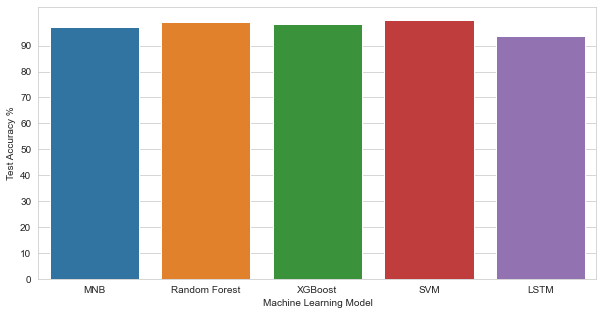

In [87]:
models = ['MNB', 'Random Forest', 'XGBoost', 'SVM', 'LSTM']
acc = [MNB_accuracy, rfc_accuracy, xgb_accuracy, svc_accuracy, LSTM_accuracy]

sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Test Accuracy %")
plt.xlabel("Machine Learning Model")
sns.barplot(x= models, y= acc)
plt.show()